evt PCA op de features?

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from tqdm import tqdm

# Set plotting parameters
plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.xmargin': 0,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelsize': 14,
    "axes.titlesize": 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20,
    'grid.linewidth': 0.35,
    "grid.color": "grey"
})

In [2]:
features = pd.read_csv("features_tweaked.csv")

C:\Users\scbui\AppData\Local\Temp\ipykernel_18472\2585949393.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("features_tweaked.csv")


### Train test split

In [7]:
metadata_columns = ['Respondent', 'Participant_ID', 'mean_rating', 'Participant_ID_short',
       'image_number', 'individual_ratings', 'ID', 'Type', "class", "Missing"]

X = features.drop(metadata_columns, axis = 1)
y = features["individual_ratings"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(_X, _y):

    n = _X.shape[1]

    model = keras.models.Sequential()
    model.add(Dense(n, input_shape = _X.shape[1:], activation="relu"))
    model.add(Dense(300, activation="relu"))
    model.add(Dense(200, activation="relu")) # less layers seem to work a bit better...
    model.add(Dense(100, activation="relu"))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1)) #Only one output node because its a regression model

    opt = Adam(learning_rate = 2.64e-2) # 1e-4 works for adam, Adam allows you to adjust the learning rate
    model.compile(loss="mean_squared_error", optimizer=opt) #This is a commen loss function

    history = model.fit(_X, _y, epochs = 40, validation_split = 0.1, verbose = 0)

    return model, history

### Train $N_{models}$ models

In [15]:
N_models = 1 #How many times do we want to train the model (maybe 10)
RMSEs = []

for i in tqdm(range(N_models)): 
    print(f"Training model: {i}...")
    _m, history = train_model(X_train_scaled, y_train) #look above for the train_model function

    performance = np.sqrt(np.mean((_m.predict(X_test_scaled[0:]).flatten() - np.array(y_test))**2)) #Performance = RSME
    print(f"Performance model {i}: {performance:.3f}") #.3f = number of numbers behind the ,

    RMSEs.append(performance)

print(f"Model total performance: {np.mean(RMSEs):.3f} +- {np.std(RMSEs):.3f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Training model: 0...
10/10 [==============================] - 0s 5ms/step


100%|██████████| 1/1 [02:22<00:00, 142.25s/it]

Performance model 0: 1.958
Model total performance: 1.958 +- 0.000


In [16]:
history.history

{'loss': [148719.8125,
  3.8719089031219482,
  3.5760245323181152,
  3.5023415088653564,
  3.5455687046051025,
  3.534691333770752,
  3.5558087825775146,
  3.5058884620666504,
  3.495239019393921,
  3.5304837226867676,
  3.518092632293701,
  3.5859527587890625,
  3.5124270915985107,
  3.557518482208252,
  3.521268367767334,
  3.495248317718506,
  3.495161771774292,
  3.5280160903930664,
  3.5056769847869873,
  3.502723455429077,
  3.502580165863037,
  3.50823974609375,
  3.5053019523620605,
  3.527095317840576,
  3.508354663848877,
  3.490795373916626,
  3.528292417526245,
  3.5852389335632324,
  3.5268170833587646,
  3.5202019214630127,
  3.495375633239746,
  3.498878240585327,
  3.522613763809204,
  3.5130221843719482,
  3.500115394592285,
  3.5030405521392822,
  3.514854669570923,
  3.5155043601989746,
  3.50002384185791,
  3.5026607513427734],
 'val_loss': [3.576503276824951,
  3.73283052444458,
  3.5659735202789307,
  3.5917654037475586,
  3.5166537761688232,
  3.57060170173645,
 

In [4]:
history = np.load("history_2.64-2_example_same_output.npy", allow_pickle=True)

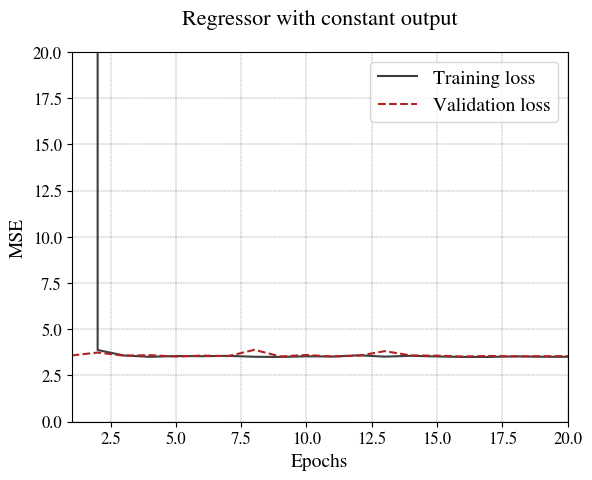

In [6]:
# Accessing the dictionary from the array
history_dict = history.item()

# Extracting loss and val_loss lists from the dictionary
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 

# Plotting loss and val_loss values
epochs = range(1, len(loss_values) + 1)
plt.figure()
plt.plot(epochs, loss_values, label='Training loss', color = "#3D3D3D")
plt.plot(epochs, val_loss_values, label='Validation loss', color = "#B22222", linestyle = "--")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Regressor with constant output')
plt.legend(fontsize = 14)
plt.grid(True)
plt.xlim(1, 20)
plt.ylim(0, 20)
plt.savefig("same_output_history.pdf", format = "pdf", bbox_inches = "tight")

plt.show()

In [8]:
print(f"Model total performance: {np.mean(RMSEs):.3f} +- {np.std(RMSEs):.3f}")

Model total performance: 1.942 +- 0.000


In [9]:
# %%capture

n = X_train_scaled.shape[1]

model = keras.models.Sequential()
model.add(Dense(n, input_shape = X_train_scaled.shape[1:], activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(200, activation="relu")) # less layers seem to work a bit better...
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1)) #Only one output node because its a regression model

print(model.summary())

opt = Adam(learning_rate = 2.64e-2) # 1e-4 works for adam 
model.compile(loss="mean_squared_error", optimizer=opt)

history = model.fit(X_train_scaled, y_train, epochs = 40, validation_split = 0.1)

plt.figure()
pd.DataFrame(history.history).plot()
plt.grid()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1541)              2376222   
                                                                 
 dense_15 (Dense)            (None, 300)               462600    
                                                                 
 dense_16 (Dense)            (None, 250)               75250     
                                                                 
 dense_17 (Dense)            (None, 200)               50200     
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 1)                

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

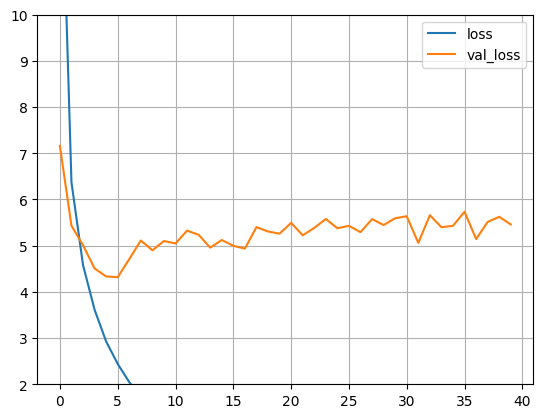

In [46]:
plt.figure()
pd.DataFrame(history.history).plot()
plt.ylim(2, 10)
# plt.xlim(0, 10)

plt.grid()
plt.show()

In [9]:
y_train

2037    3.0
787     4.0
759     1.0
1196    1.0
1494    5.0
       ... 
1638    3.0
1095    6.0
1130    2.0
1294    5.0
860     2.0
Name: individual_ratings, Length: 2683, dtype: float64

In [11]:
_m.predict(X_train_scaled[0:])

84/84 [==============================] - 0s 4ms/step


array([[4.032275],
       [4.032275],
       [4.032275],
       ...,
       [4.032275],
       [4.032275],
       [4.032275]], dtype=float32)

RMSE (Root Mean Squared Error): 

$\sqrt{\langle (y_{pred} - y_{true})^2 \rangle}$



In [1]:
np.sqrt(np.mean((model.predict(X_test_scaled[0:]).flatten() - np.array(y_test))**2))

NameError: name 'np' is not defined

# Random models

### How well does a random model perform? 

We simulate a randomly initialized model that can only output numbers from 1 - 7

Bij een (nog meer) random model is de RMSE rond de 4.2, bij het huidige model rond de 2.5, dus je wint wel bijna 2 punten

In [8]:
RMSEs = []
labels = []

for i in range(len(y_test)):
    labels.append(y_test.iloc[i])

for i in tqdm(range(20)):
    y_random_predict = np.random.choice(labels)
    RMSEs.append(np.sqrt(np.mean((y_random_predict - np.array(y_test))**2)))

print(f"Random model performance: RMSE: {np.mean(RMSEs)} +- {np.std(RMSEs)}")

100%|██████████| 20/20 [00:00<00:00, 1766.10it/s]

Random model performance: RMSE: 2.680279304097266 +- 0.5694706594382072


In [9]:
RMSEs

[2.8472835143995123,
 2.1506785115866736,
 1.9457525991907412,
 2.1506785115866736,
 2.7321937967764685,
 2.8472835143995123,
 3.642465995507452,
 3.5077553828747745,
 2.7321937967764685,
 1.9457525991907412,
 2.8472835143995123,
 2.8472835143995123,
 2.8472835143995123,
 3.642465995507452,
 2.1506785115866736,
 1.9457525991907412,
 3.642465995507452,
 2.7321937967764685,
 2.2240702089444886,
 2.2240702089444886]

In [4]:
_min = 1
_max = 7

RMSEs = []

for i in tqdm(range(20)):
    y_random_predict = (np.random.rand(y_test.shape[0])) * 6 + 1
    RMSEs.append(np.sqrt(np.mean((y_random_predict - np.array(y_test))**2)))

print(f"Random model performance: RMSE: {np.mean(RMSEs)} +- {np.std(RMSEs)}")

  0%|          | 0/20 [00:00<?, ?it/s]


NameError: name 'y_test' is not defined

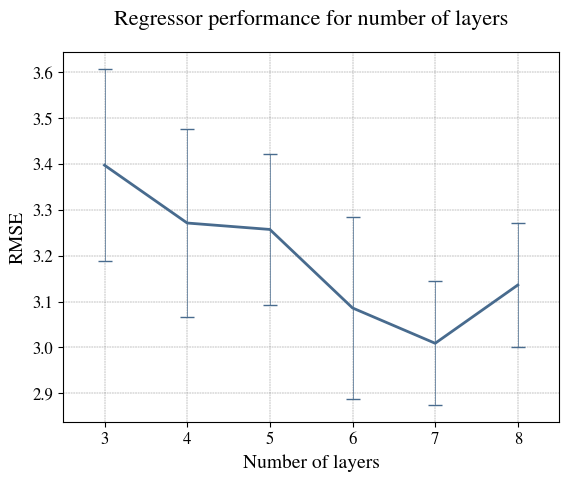

In [5]:
RSME_layers = [3.397, 3.271, 3.257, 3.086, 3.009, 3.136] 
stds_layers = [0.209, 0.205, 0.164, 0.198, 0.135, 0.136] 
input_layers = [3, 4, 5, 6, 7, 8]

plt.figure()
# plt.errorbar(input_layers, RSME_layers, stds_layers, fmt = "", capsize = 5, linewidth = 0.5)

# Plot trendline
plt.plot(input_layers, RSME_layers, marker='', color='#486B8E', linewidth=2)  # Adjust trendline linewidth here

# Plot error bars separately with thin linewidth
plt.errorbar(input_layers, RSME_layers, stds_layers, fmt='none', capsize=5, color='#486B8E', linewidth=0.5)
plt.ylabel("RMSE")
plt.xlabel("Number of layers")
plt.title("Regressor performance for number of layers")
plt.xlim(2.5, 8.5)
plt.grid(True)
plt.savefig("layers_sweep_regression.pdf", format = "pdf", bbox_inches = "tight")

plt.show()